1. Loading and Preprocessing

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


df = pd.read_csv("CarPrice_Assignment.csv")  

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

df['CarCompany'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
df.drop(['CarName'], axis=1, inplace=True)

df['CarCompany'] = df['CarCompany'].replace({
    'vw': 'volkswagen', 'vokswagen': 'volkswagen',
    'toyouta': 'toyota', 'nissan': 'nissan',
    'maxda': 'mazda', 'porcshce': 'porsche'
})


X = df.drop(['price', 'car_ID'], axis=1)
y = df['price']


categorical_cols = X.select_dtypes(include='object').columns
numeric_cols = X.select_dtypes(include=np.number).columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(drop='first'), categorical_cols)
])

X_processed = preprocessor.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

2. Model Implementation

In [4]:
# Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    print(f"{name} model trained.")

Linear Regression model trained.
Decision Tree model trained.
Random Forest model trained.
Gradient Boosting model trained.
SVR model trained.


3. Model Evaluation

In [6]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

evaluation_results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    evaluation_results[name] = {
        'R²': r2,
        'MSE': mse,
        'MAE': mae
    }

evaluation_df = pd.DataFrame(evaluation_results).T

print("Model Evaluation Results:")
print(evaluation_df.sort_values(by='R²', ascending=False))

Model Evaluation Results:
                             R²           MSE           MAE
Random Forest      9.582669e-01  3.294575e+06  1.293234e+03
Gradient Boosting  9.241813e-01  5.985429e+06  1.710336e+03
Decision Tree      9.069070e-01  7.349134e+06  1.782589e+03
SVR               -9.981298e-02  8.682366e+07  5.695391e+03
Linear Regression -2.742263e+22  2.164853e+30  2.297853e+14


Random Forest Regressor is the most accurate and reliable model among all five.
It achieves the best balance of high R²  and low error metrics.
It also has better generalization power due to ensemble averaging.

4. Feature Importance Analysis

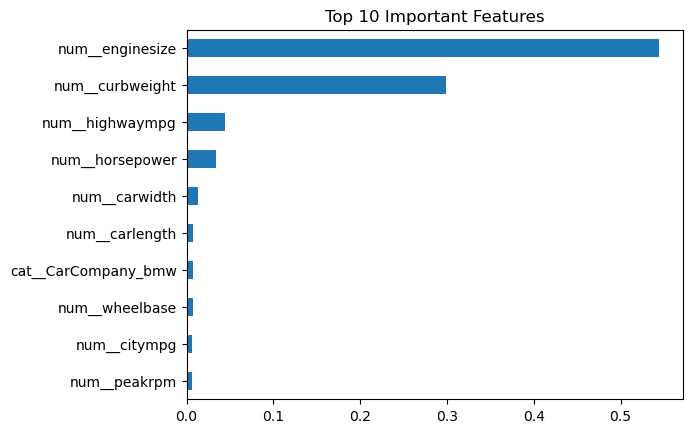

In [10]:
import matplotlib.pyplot as plt

rf_model = models['Random Forest']
if hasattr(rf_model, "feature_importances_"):
    importances = rf_model.feature_importances_
    feature_names = preprocessor.get_feature_names_out()
    importance_df = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)

    importance_df.plot(kind='barh')
    plt.title("Top 10 Important Features")
    plt.gca().invert_yaxis()
    plt.show()

5. Hyperparameter Tuning

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

print("Tuned R2 Score:", r2_score(y_test, y_pred_tuned))

Tuned R2 Score: 0.9594648507194989


Before Tuning R2 :0.9582669
After Tuning R2:0.9594648
so, there is a slightly improvement